### IDs:
Insert yours IDs to the cell below

ID #1:

ID #2:


## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

import warnings
warnings.simplefilter('ignore')

import seaborn as sns

from scipy import stats

import random

from IPython.core.pylabtools import figsize

### Question 1 - Defective products

In a manufacturing pipeline products are 3% defective. We are interested in examining a defective product to see what goes wrong on the belt. We need to ask the facility manager to send us a set of independent samples for examination.

#### 1.A

How many independent samples should we ask for in order to have a 85% probability of having at least one defective product in the batch sent? You should write a function.

In [3]:
from scipy.stats import binom

def find_sample_size_binom(defective_rate, requested_probability, at_least_x_defective):
    """
    Using Binom to returns the minimal number of samples required to have requested_probability of receiving 
    at_least_x_defective products from a production line with a defective rate of defective_rate.
    """
    
    prob = 0
    n = at_least_x_defective - 1    
    while prob < requested_probability:
        n +=1
        # sf = 1 - cdf -> checking P(X > at_least_x_defective - 1) -> P(X >= at_least_x_defective)
        prob = binom.sf(at_least_x_defective - 1, n, defective_rate)  
    return n

In [4]:
from scipy.stats import nbinom

def find_sample_size_nbinom(defective_rate, requested_probability, at_least_x_defective):
    """
    Using NBinom to return the minimal number of samples required to have requested_probability of receiving 
    at_least_x_defective products from a production line with a defective rate of defective_rate.
    """
    prob = 0
    at_least_x_defective 
    k = -1 # num_failures
    while prob < requested_probability:
        k +=1
        prob = nbinom.cdf(k, at_least_x_defective, defective_rate, loc=at_least_x_defective)  
    return k

In [5]:
find_sample_size_binom(0.03, 0.85, 1), find_sample_size_nbinom(0.03, 0.85, 1)

(63, 63)

In [6]:
stats.nbinom.ppf(q=0.85, n=1, p=0.03, loc=1)

63.0

#### 1.B
Answer this part again with the following changes: products are 4% defective and we want a 95% probability of at least one defective product in the batch.

In [7]:
find_sample_size_binom(0.04, 0.95, 1), find_sample_size_nbinom(0.04, 0.95, 1)

(74, 74)

In [8]:
stats.nbinom.ppf(q=0.95, n=1, p=0.04, loc=1)

74.0

#### 1.C 

Consider the following cases and calculate how many independent samples are required: 

1. Products are 10% defective and we want a 90% probability of at least 5 defective products in the batch.
1. Products are 30% defective and we want a 90% probability of at least 15 defective products in the batch.

Explain the difference between the two results. You should use mathematical reasoning based on the properties of distributions you saw in class and visualizations in your answer.

In [10]:
find_sample_size_binom(0.1, 0.9, 5), find_sample_size_nbinom(0.1, 0.9, 5)

(78, 78)

In [9]:
stats.nbinom.ppf(q=0.9, n=5, p=0.1, loc=5)

78.0

In [11]:
find_sample_size_binom(0.3, 0.9, 15), find_sample_size_nbinom(0.3, 0.9, 15)

(64, 64)

In [10]:
stats.nbinom.ppf(q=0.9, n=15, p=0.3, loc=15)

64.0

r - num_successes <br>
p - success probability

In Scipy nbinom calculates the number of failure.<br>
We are calculating the number of trails.<br>
We need to add to Scipy result the amount of successes (r) in order to get the amount of trails.<br>
We can do that using the loc param.

In [15]:
nbinom.mean(5, 0.1, loc=5), nbinom.mean(15, 0.3, loc=15)

(50.0, 50.0)

We saw in class that the mean of NBinom(r, p) is $\dfrac{r}{p}$. <br>
If we are multiply r and p in some scalar $\alpha$ **the mean won't be changed**
$$\dfrac{\alpha r}{\alpha p} = \dfrac{r}{p}$$

The means are the same. What about the variances?

In [14]:
nbinom.var(5, 0.1, loc=5), nbinom.var(10, 0.2, loc=10)

(450.0, 200.0)

We saw in class that the variance of NBinom(r, p) is $\dfrac{r(1-p)}{p^2}$. <br>
If we are multiply r and p in some scalar $\alpha$ **the variance will be changed**
$$\dfrac{\alpha r(1-\alpha p)}{(\alpha p)^2} = \dfrac{r(1-\alpha p)}{\alpha p^2}$$
For $\alpha > 1$:
$$\dfrac{r(1-\alpha p)}{\alpha p^2} < \dfrac{r(1-p)}{p^2}$$
\* The numerator is decreasing and the denominator is increasing

The conclusion is that when the desire probability is large enough we need more trails in the large variance case. <br>
If the desire probability is low we'll prefer the distribution with the low variance.

In [12]:
def plot_kde_with_lines(x, fill_end_point, line_color, fill_color, ax, dist_mean):
    #plotting the PDF (do this before plotting anything else)
    ax_ = sns.distplot(x, hist=True, ax=ax, color=line_color)
    kde_x, kde_y = ax_.lines[0].get_data()
    max_x = int(np.ceil(max(kde_x)))
    min_x = int(np.floor(min(kde_x)))
    #plotting the two lines
    p1 = ax_.axvline(x=fill_end_point, color=line_color)
    p2 = ax_.axvline(x=dist_mean, color=line_color, linestyle='--')
    
    ax.set_xlim(0, 91)
    ax.set_xticks(range(0, 91, 2))

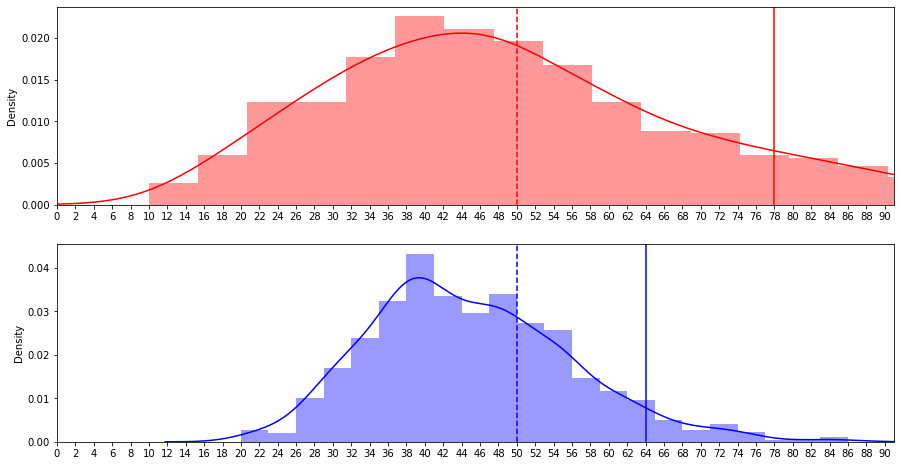

In [13]:
# 1.B.2
x_nbinom_1b2 = nbinom.rvs(5, 0.1, loc=5, size=1000)
# 1.B.3
x_nbinom_1b3 = nbinom.rvs(15, 0.3, loc=10, size=1000)

fig, ax = plt.subplots(2, 1)
fig.set_figwidth(15)
fig.set_figheight(8)

plot_kde_with_lines(x_nbinom_1b2, 78, 'r', '#EF9A9A', ax[0], 5 / 0.1)
plot_kde_with_lines(x_nbinom_1b3, 64, 'b', '#33CCFF', ax[1], 15 / 0.3)

plt.show()

We can do even better plot with bar plot

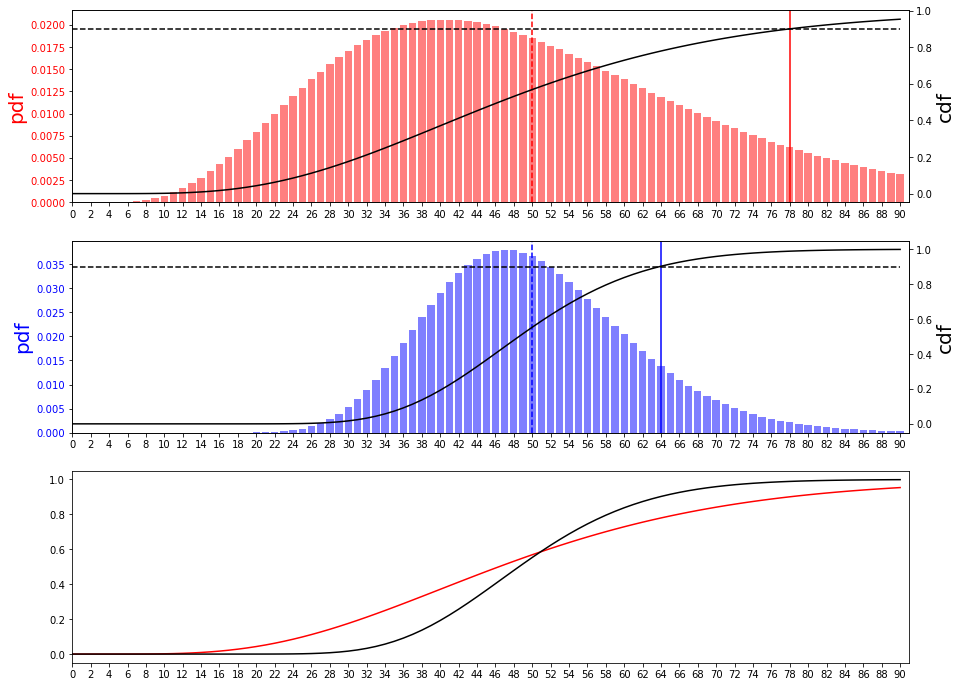

In [17]:
x = np.linspace(0, 90, 91)
# 1.B.2
y_nbinom_1b2 = nbinom.pmf(x, 5, 0.1, loc=5)
# 1.B.3
y_nbinom_1b3 = nbinom.pmf(x, 15, 0.3, loc=15)

fig, ax = plt.subplots(3, 1)
fig.set_figwidth(15)
fig.set_figheight(12)

ax[0].bar(x, y_nbinom_1b2, color='r', alpha=0.5)
ax[0].axvline(x=78, color='r')
ax[0].axvline(x=5 / 0.1, color='r', linestyle='--')
ax[1].bar(x, y_nbinom_1b3, color='b', alpha=0.5)
ax[1].axvline(x=64, color='b')
ax[1].axvline(x=15 / 0.3, color='b', linestyle='--')
# adding cdf
# 1.B.2
y_cdf_nbinom_1b2 = nbinom.cdf(x, 5, 0.1, loc=5)
# 1.B.3
y_cdf_nbinom_1b3 = nbinom.cdf(x, 15, 0.3, loc=15)
ax2 = [ax[0].twinx(), ax[1].twinx()] # instantiate a second axes that shares the same x-axis

ax2[0].plot(x, y_cdf_nbinom_1b2, color='k')
ax2[0].plot([0, 90], [0.9, 0.9], '--k')
ax2[1].plot(x, y_cdf_nbinom_1b3, color='k')
ax2[1].plot([0, 90], [0.9, 0.9], '--k')
# cdf plot only
ax[2].plot(x, y_cdf_nbinom_1b2, color='r')
ax[2].plot(x, y_cdf_nbinom_1b3, color='k')

ax[0].set_ylabel('pdf', color='r', fontsize=20)
ax[0].tick_params(axis='y', labelcolor='r')
ax[0].set_xlim(0, 91)
ax[0].set_xticks(range(0, 91, 2))
ax2[0].set_ylabel('cdf', color='k', fontsize=20)
ax[1].set_ylabel('pdf', color='b', fontsize=20)
ax[1].tick_params(axis='y', labelcolor='b')
ax[1].set_xlim(0, 91)
ax[1].set_xticks(range(0, 91, 2))
ax2[1].set_ylabel('cdf', color='k', fontsize=20)
ax[2].set_xlim(0, 91)
ax[2].set_xticks(range(0, 91, 2))

plt.show()

### Question 2 - Rent distributions in Randomistan

The state of Randomistan conducted a survey to study the distribution of rent paid in two neighboring towns, Stochastic Heights and Random Grove, to be denoted SH and RG.<br> 

Here are some findings of the survey:
* The population of SH and RG is 16,000 and 22,000 respectively. <br>
* The mean rent in SH and RG is 6300RCU and 4200RCU respectively.
* The median rent is 4600RCU in both towns.
* The IQR of the rent is smaller in SH than in RG.

All data generated in this question needs to be consistent with these findings.

In [18]:
sh_population = 16000
rg_population = 22000

sh_median = 4600
rg_median = 4600

sh_mean = 6300
rg_mean = 4200

sh_data = []
rg_data = []

#### 2.A
Draw histograms that describe 2 different scenarii of possible distributions of rent in the two towns.Your histograms should:<br>
* Use bins of 100RCU each.
* Have at least 10 non zero bins.

In [19]:
def plot_data(sh, rg):
    figsize(10, 6) 
    data_min = min(sh.min(), rg.min())
    data_max = max(sh.max(), rg.max())

    bins = range(0, int(data_max) + 100, 100)

    plt.xlim([data_min-100, data_max+100])
    plt.hist(sh, bins, alpha=0.5, label="SH", color="r", rwidth=0.8)
    plt.hist(rg, bins, alpha=0.5, label="RG", color="b", rwidth=0.8)
    
    plt.axvline(sh.mean(), color="r", linestyle="--", label="SH mean {sh.mean():.2f}")
    plt.axvline(rg.mean(), color="b", linestyle="--", label="RG mean {rg.mean():.2f}")
    
    plt.axvline(np.median(sh), color="r", linestyle=":", label="SH median {np.median(sh):.2f}")
    plt.axvline(np.median(rg), color="b", linestyle=":", label="RG median {np.median(rg):.2f}")
    
    rg_q1, rg_q3 = np.quantile(rg, [0.25, 0.75])      
    plt.hlines(y=1000, xmin=rg_q1, xmax=rg_q3, label="RG IQR {stats.iqr(rg):.2f}", colors="b")
    
    sh_q1, sh_q3 = np.quantile(sh, [0.25, 0.75])  
    plt.hlines(y=2000, xmin=sh_q1, xmax=sh_q3, label="SH IQR {stats.iqr(sh):.2f}", colors="r")

    plt.title('Income in SH and RG, in RCU')
    plt.xlabel('Income')
    plt.ylabel('Number of housholds')
    plt.legend(loc='best', bbox_to_anchor=(0.75, -0.1), ncol=2)

    plt.show()   

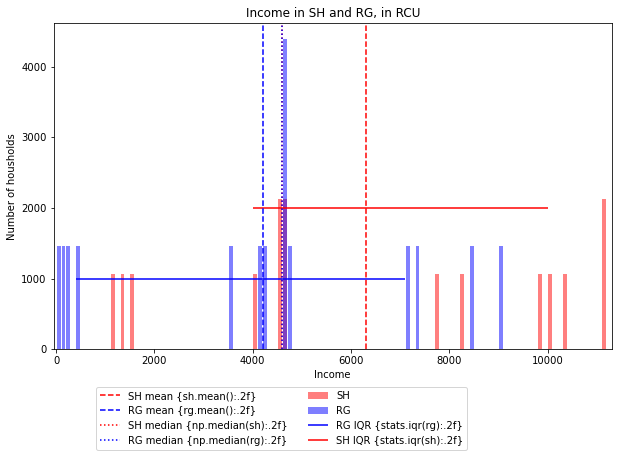

In [80]:
sh_rent = np.array([1100,1300,1500,4000,4500,4550,4600,4600,7700,8200,10000,10300,9850,11100,11200]*int(sh_population/15))

rg_rent = np.array([50,150,200,400,3510,4100,4200,4600,4600,4650,4700,7100,7350,8400,9000]*int(rg_population/15))
plot_data(sh=sh_rent, rg=rg_rent)

In [81]:
np.median(sh_rent), np.median(rg_rent)

(4600.0, 4600.0)

In [82]:
np.mean(sh_rent), np.mean(rg_rent)

(6300.0, 4200.666666666667)

In [83]:
stats.iqr(sh_rent), stats.iqr(rg_rent)

(6000.0, 6700.0)

#### 2.B
Draw a histogram of a third scenario with the same properties. <br>
In addition, in this scenario the rent in SH should have a higher variance than the rent in RG.

In [84]:
np.var(sh_rent), np.var(rg_rent), np.var(sh_rent) > np.var(rg_rent)

(12491000.0, 8289072.88888889, True)

The survey also examined the per household income (PHI) in these two places.<br>

It found that:<br>
* The mean of PHI in SH is 12500 and in RG is 8500.
* The median is 12000 in SH and 8000 in RG.
* The covariance of the rent and the PHI was observed to be as in the formula below with $\alpha=97\%$ and $\alpha=89\%$ in SH and in RG respectively.<br><br>
$$Cov(rent, PHI) = \alpha * \sqrt{Var(rent)} * \sqrt{Var(PHI)}$$

#### 2.C
Produce rent and PHI data for the two cities, that is consistent with these findings. The covariances in your data can deviate by up to 1% from the numbers given $\alpha$.

In [85]:
sh_phi = \
    np.array([200,800,1100,7100,8200,9000,12000,12000,14000,16600,17000,18000,19700,23000, 28800]*int(sh_population/15))
rg_phi = \
    np.array([300,450,600, 900, 900, 1000, 4500,8000, 8500, 8650, 9700, 10000,13000,30000,31000]*int(rg_population/15))

In [86]:
np.median(sh_phi), np.median(rg_phi)

(12000.0, 8000.0)

In [87]:
np.mean(sh_phi), np.mean(rg_phi)

(12500.0, 8500.0)

In [90]:
from scipy.stats import pearsonr

In [92]:
print('alpha = {:.2f}'.format(np.corrcoef(sh_phi, sh_rent)[0, 1]))
print('pearson = {:.2f}'.format(pearsonr(sh_phi, sh_rent)[0]))

alpha = 0.96
pearson = 0.96


In [93]:
print('alpha = {:.2f}'.format(np.corrcoef(rg_phi, rg_rent)[0, 1]))
print('pearson = {:.2f}'.format(pearsonr(rg_phi, rg_rent)[0]))

alpha = 0.85
pearson = 0.85


#### 2.D
Produce two heatmaps that describe these two bivariate joint distributions. Make sure you carefully consider the selected binning resolution.

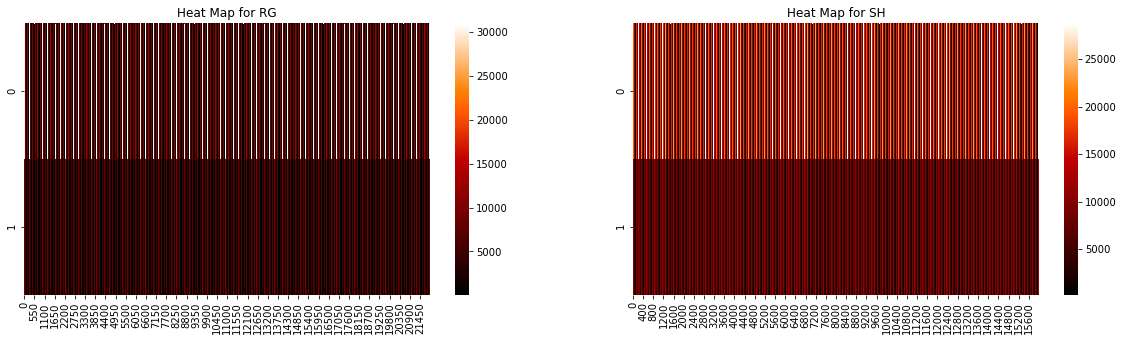

In [37]:
fig = plt.figure(figsize=(20,5))
#Heat Map for RG:
plt.subplot(1, 2, 1)
sns.heatmap([rg_phi,rg_rent], cmap="gist_heat")
plt.title('Heat Map for RG')

#Heat Map for SH:
plt.subplot(1, 2, 2)
sns.heatmap([sh_phi, sh_rent], cmap="gist_heat")
plt.title('Heat Map for SH');

Text(0.5, 1.0, 'Heat Map for SH')

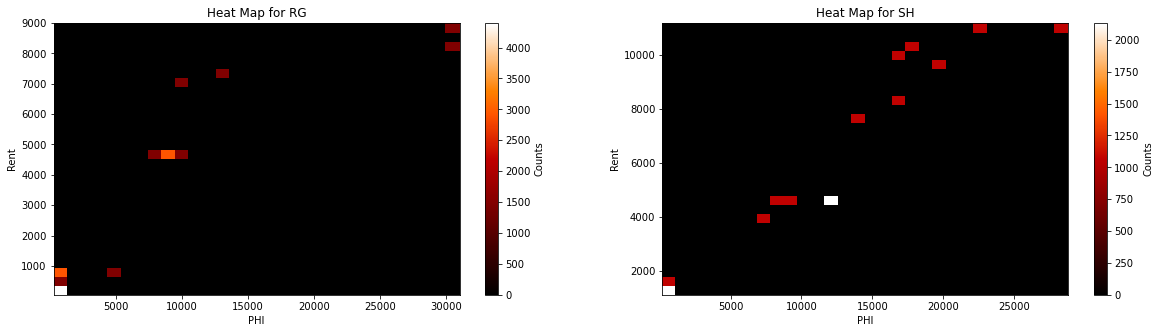

In [38]:
fig = plt.figure(figsize=(20,5))
#Heat Map for RG:
plt.subplot(1, 2, 1)
plt.hist2d(rg_phi, rg_rent, bins=30, cmap="gist_heat")
plt.xlabel('PHI')
plt.ylabel('Rent')
cbar = plt.colorbar()
cbar.ax.set_ylabel('Counts')
plt.title('Heat Map for RG')

#Heat Map for SH:
plt.subplot(1, 2, 2)
plt.hist2d(sh_phi, sh_rent, bins=30, cmap="gist_heat")
plt.xlabel('PHI')
plt.ylabel('Rent')
cbar = plt.colorbar()
cbar.ax.set_ylabel('Counts')
plt.title('Heat Map for SH')

### Question 5 - Convolutions

#### 5.A
Write a program, `Q = NFoldConv(P , n)`, that takes as input:
* A distribution, P, of a random variable that takes finitely many integer values
* An integer n

and produces the distribution, Q, of the sum of n independent repeats of random variables, each of which has the distribution P.

In [96]:
from itertools import product

def calc_probs(P,n):
    if n == 1:
        return P
    
    return np.convolve(P,calc_probs(P,n - 1))

def calc_values(v,original,n):
    if n == 1:
        return v
    
    combinations = np.array(list(product(v,original)))
#     print(combinations)
    values = np.unique(np.sum(combinations,axis=1))
#     print(values)
    return calc_values(values,original,n-1)

def nfold_conv(P,n):
    '''Returns the distribution obteined by convolving P with itself n times.
    
    Args:
        P (np.array) - a two dim array, such that 
        P[0] is the values of the distribution
        P[1] is the probabilities of the distribution.
        
        n (int) - number of times to convolve P with itself.
        
    Returns:
        np.array - A two dimensional array of new 
    '''
    return np.vstack((calc_values(P[0],P[0],n), calc_probs(P[1],n))) 

#### 5.B
Compute the distribution of the sum of the results of rolling a fair octahedron 17 times.

<img src="https://upload.wikimedia.org/wikipedia/commons/2/27/Octahedron.jpg" width="200">


In [97]:
# X is an array of 6 values each with probability 1/8 exactly.
n = 17
X = np.vstack((np.arange(1,9),np.ones(8) / 8))
conv = nfold_conv(X,n)

In [98]:
def plot_conv_dist(conv, title):
    fig = plt.figure()
    fig.set_figheight(8)
    fig.set_figwidth(16)
    plt.bar(conv[0], conv[1])
    plt.title(title)

    plt.show()

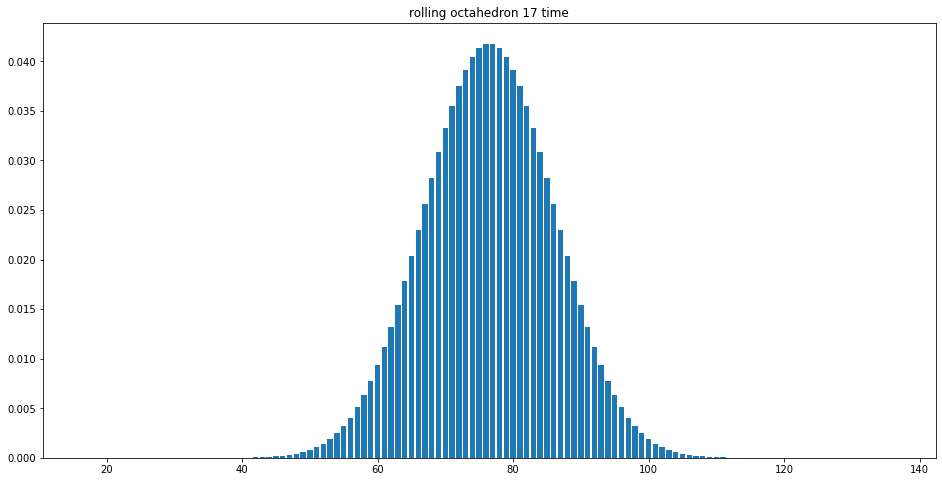

In [99]:
plot_conv_dist(conv, 'rolling octahedron 17 time')